# Ejercicio 4


## INTRODUCCION
En este ejercicio se estudia la relacion entre las magnitudes en la banda $g$ y la banda $r$ de las galaxias y se realiza un ajuste lineal (es log vs log) de los puntos.

## Metodo

Para hacer le ajuste lineal, se escojen solo los puntos donde tiene sentido realizar el ajuste, es decir que los demas no son tenidos en cuenta y se descartan por ser off-layer. El ajuste demuestra una correlacion entre ambas bandas y se realiza mediante el metodo de cuadrados minimos. 



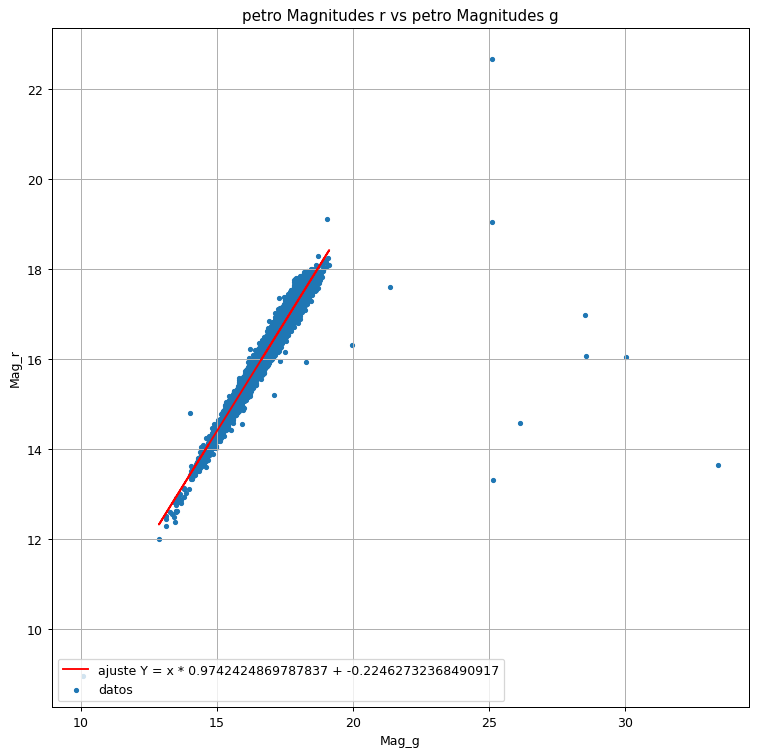

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import scipy.stats as st

df = pd.read_csv('GUIA3_patricioc.csv')

alpha=0.05

A=df.sort_values(by=['spiral']) 
B=df.loc[df[ 'spiral' ] == 1]
C=df.loc[df[ 'elliptical' ] == 1]


def lineal(x,y):
    #devuelve el ajuste lineal de la funcion y=a*x+b por cuadrados minimos y te da el r con del ajuste (que tan bien es parecido a una recta)
    import numpy as np
    x=np.array(x)
    y=np.array(y)
    if (len(x)!=len(y)):
        print('Error, x no tiene las mismas dimensiones que y')
    else:
        n=len(x)
        a=(n*sum(x*y,0)-sum(x,0)*sum(y,0))/(n*sum(x*x,0)-(sum(x,0))**2)
        b=(sum(y,0)-a*sum(x,0))/n
        xm=sum(x)/n
        ym=sum(y)/n
        num=sum((x-xm)*(y-ym),0)
        dem=(((sum((x-xm)**2,0))**0.5)*((sum((y-ym)**2,0))**0.5))
        r=num/dem
    return(a,b,r)

y = A['petroMag_r']
x = A['petroMag_g']

plt.figure(figsize=(10, 10), dpi=90) #dpi es la resolucion
plt.scatter(x,y, 10, label='datos')
plt.ylabel('Mag_r')
plt.xlabel('Mag_g')
plt.title('petro Magnitudes r vs petro Magnitudes g')
plt.grid(True)

x1=[]
y1=[]

for i in range(len(x)):
    if (12<x[i]<19.5):
        x1.append(x[i])
        y1.append(y[i])

a,b,r=lineal(x1,y1)
x1=np.array(x1)
y1=np.array(y1)
plt.plot(x1,a*x1+b,color='red',label= 'ajuste Y = x * ' + str(a) + ' + ' + str(b))
plt.legend(loc=3) 
plt.savefig('RphVSRsp0.png')
plt.show()

# CONCLUSION

El ejercicio muestra una correlacion casi 1 a 1 entre la banda g y la banda r de magnitudes de petrov con una ordenada al origen del -0.2. Recordemos que este grafico en realidad es una relacion log log por lo tanto es una exponencial.